In [181]:
import sncosmo, ktransit
from lightkurve import KeplerTargetPixelFile
import lightkurve
import matplotlib.pyplot as plt

In [182]:
tpf = KeplerTargetPixelFile.from_archive(4840675, quarter=4)
LC = tpf.to_lightcurve(aperture_mask='pipeline')
time = LC.time
flux = LC.flux
T0 = 400

In [183]:
#LC = tpf.to_lightcurve(aperture_mask='pipeline')
#LCt = tpf.to_lightcurve(aperture_mask='all')
#plt.plot(tpf.time, LC.flux, color='red', label='ap mask = pipe')
#plt.plot(tpf.time, LCt.flux, color='orange', label='ap mask = all')
#plt.legend()

In [190]:
class Injection(object):
    
    def __init__(self, time, flux, T0):
        self.time = time
        self.flux = flux
        self.T0 = T0
        
    
    def inject_supernova(self, source='hsiao', z=0.5, amplitude=1.e-5):
        model = sncosmo.Model(source=source)
        model.set(z=z, t0=T0, amplitude=amplitude)
        bandflux = model.bandflux('desr', self.time)
        #snflux = model.flux(self.time, [4000., 4100., 4200.])
        print(len(self.flux))
        mergedflux = self.flux + bandflux
        return snflux, mergedflux
    
    def inject_planet(self, period, rprs, impact=0, e=0, rho=1.5, ld1=0.2, ld2=0.4, ld3=0.0, ld4=0.0, dil=0.0, zpt=0.0):
        model = ktransit.LCModel()
        model.add_star(rho=rho, ld1=ld1, ld2=ld2, ld3=ld3, ld4=ld4, dil=dil, zpt=zpt)
        model.add_planet(T0=self.T0, period=period, rprs=rprs, impact=impact)
        model.add_data(time=self.time)                                 # timestamps to evaluate the model on
        tmod = model.transitmodel
        mergedflux = self.flux + tmod
        return mergedflux



In [191]:
inj = Injection(time, flux, T0)
inj.time
inj.T0

400

4116


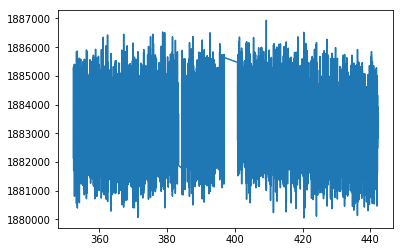

In [192]:
snflux, snmergedflux = inj.inject_supernova()
plt.plot(time, snmergedflux)

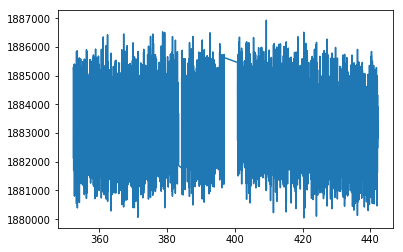

In [193]:
planetflux = inj.inject_planet(period=5.0, rprs=0.2)
plt.plot(time, planetflux)